<center><img src="images/header.png"></center>

<h1><center>Алгоритмы интеллектуальной обработки больших объемов данных</center></h1>
<hr>
<h2><center>SVM, Kernel Trick (практика)</center></h2>

**Срок сдачи:** 23 декабря 2017, 06:00 <br> 
**Штраф за опоздание:** -2 балла после 06:00 23 декабря, -4 балла после 06:00 30 декабря, -6 баллов после 06:00 6 января

При отправлении ДЗ указывайте фамилию в названии файла<br>

Не забудте создать задание в Slack через /todo.

Используйте данный Ipython Notebook при оформлении домашнего задания.

In [10]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (20, 10)

Функция `select_model` принимает на вход обучающую выборку и возвращает модель (машину опорных векторов) с наилучшими параметрами для данной выборки. Эту функцию нужно реализовать.

Подбираемые параметры подели включают в себя:
- различные функции ядра (линейное, RBF, полиномиальные разных степеней)
- различные значения константы $C$ ($0, 0.1, 1, 10, 100, 1000, 10000$)

Подбирать параметры необходимо с помощью 10-fold кросс-валидации. Сейчас в качестве заглушки функция всегда возвращает линейный SVC.

# Регрессия с SVM (3 балла)

Загрузите набор данных из *titanium.csv*<br/>
Мы будем решать задачу восстановления столбца 'y' по столбцу 'x'.

## Визуализация данных (1 балл)

Выполните стандартную предобработку данных (z-score) и выведите их на графике.

In [2]:
data = pd.read_csv('titanium.csv')

In [3]:
X = data['x'].values.reshape(-1, 1)
X = (X - X.mean())/X.std()
y = data['y'].values

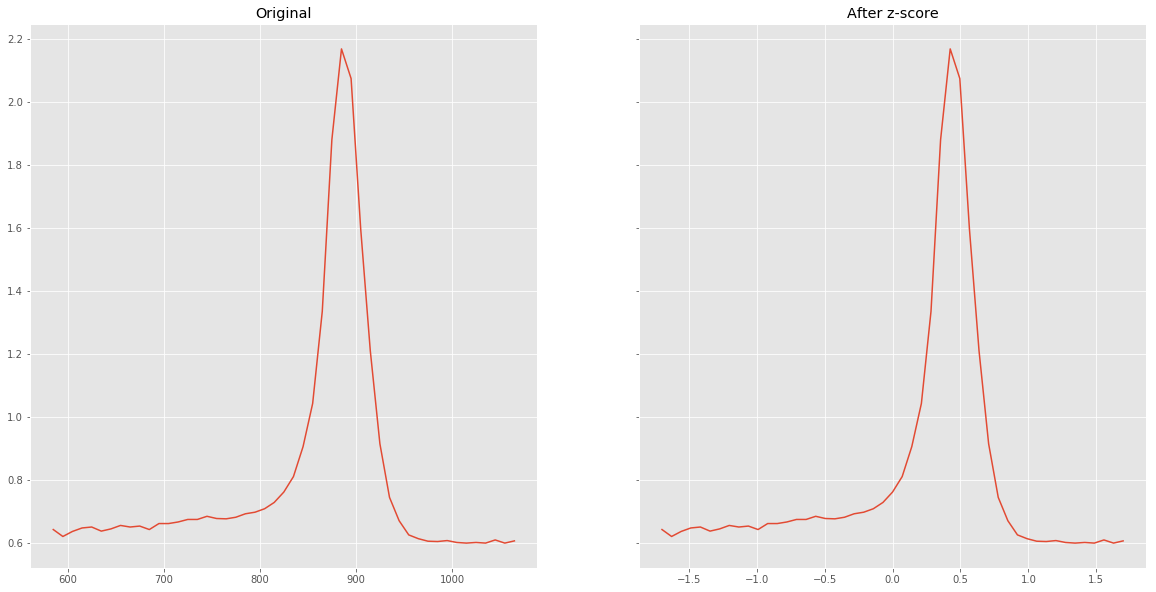

In [11]:
# Two subplots, unpack the axes array immediately
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(data['x'], data['y'])
ax1.set_title('Original')
ax2.plot(X, y)
ax2.set_title('After z-score')

## Обучение моделей (2 балла)

Рассмотрите 3 ядра: 
* Линейное
* Полиномиальное (degree = 3, gamma = 6, coef0 = 1)
* RBF (gamma = 6, coef0 = 1)

Во всех случаях установить ширину трубки `epsilon=0.01`

Для каждого из ядер:
1. Пусть `C = np.logspace(-2, 2, 10)`. Постройте графики зависимости ошибки от параметра $C$ (ось графика со значениями параметра $C$ должна быть в логарифмической шкале). Ошибка измеряется как средняя абсолютная ошибка. 
2. Для наулучшего параметра $С$ каждого из ядер постройте график с данными и предстазанием по svm

В каких случаях возникает эффекты недообучения, переобучения?

In [5]:
from sklearn.metrics import mean_absolute_error
from itertools import product

In [6]:
C_values = np.logspace(-2, 2, 10)
kernels = [{'kernel': 'linear'}, {'kernel': 'poly', 'degree': 3, 'gamma': 6},
           {'kernel': 'rbf', 'gamma': 6, 'coef0': 1}]
epsilon = 0.01

In [7]:
mae_df = pd.DataFrame(columns=['mae', 'C', 'kernel'])
values = product(C_values, kernels)

for C, kernel_parameters in values:
    svr = SVR(C=C, epsilon=epsilon, **kernel_parameters)
    svr.fit(X, y)
    mae = mean_absolute_error(y, svr.predict(X))
    mae_df = mae_df.append(
        {'C': C, 'kernel': kernel_parameters['kernel'], 'mae': mae}, ignore_index=True)

In [8]:
mae_df.head()

,mae,C,kernel
0,0.176766,0.010000,linear
1,0.176709,0.010000,poly
2,0.142149,0.010000,rbf
3,0.176767,0.027826,linear
4,0.176709,0.027826,poly


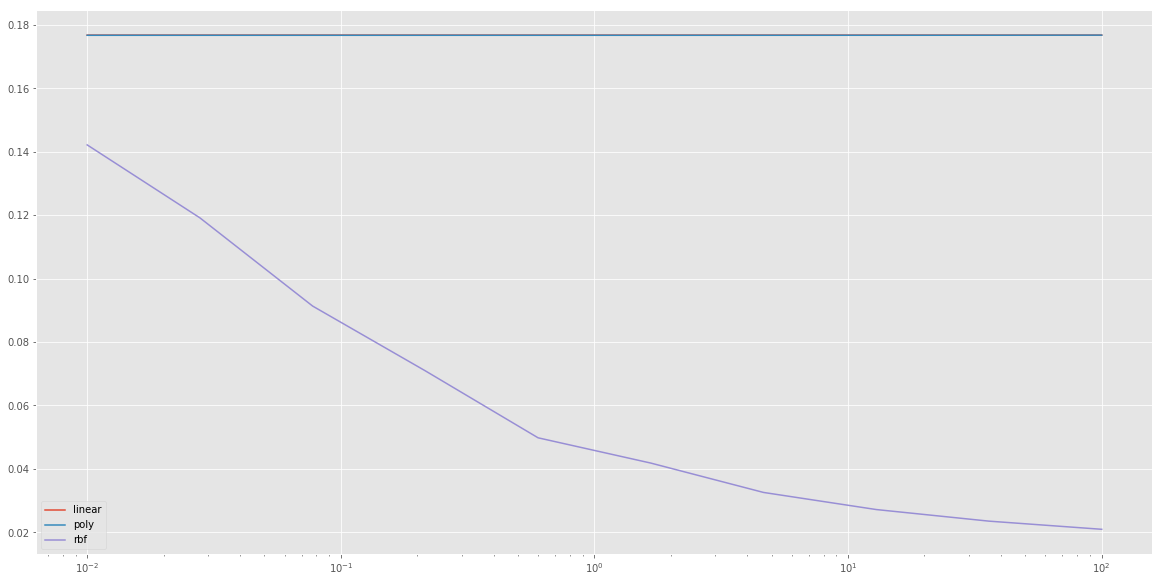

In [12]:
for kernel in mae_df['kernel'].unique():
    df = mae_df[mae_df['kernel'] == kernel]
    plt.plot(df['C'], df['mae'], label=kernel)
plt.xscale('log')
plt.legend()

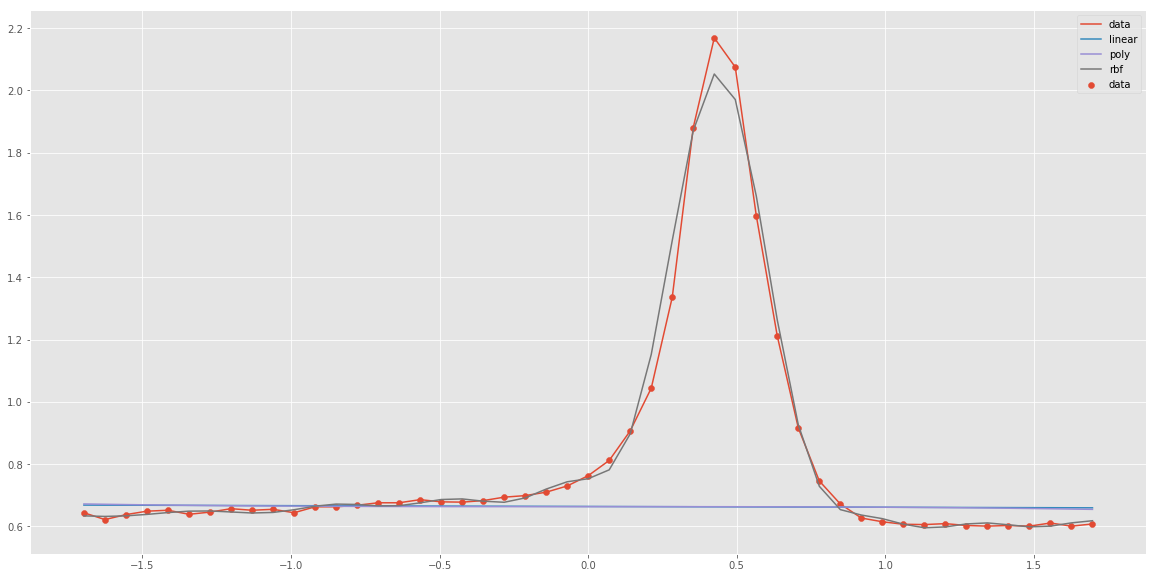

In [13]:
plt.plot(X, y, label='data')
plt.scatter(X, y, label='data')
for kernel in mae_df['kernel'].unique():
    df = mae_df[mae_df['kernel'] == kernel]
    best_C = df.loc[df['mae'].argmin()]['C']
    kernel_parameters = (
        item for item in kernels if item['kernel'] == kernel).next()
    svr = SVR(C=best_C, epsilon=epsilon, **kernel_parameters)
    svr.fit(X, y)
    plt.plot(X, svr.predict(X), label=kernel)
plt.legend()

# Определение языка слова (7 баллов)

В данном задании вам необходимо определить, на каком языке написано слово.

Вам будет дано два текста - первые предложения произведения "Война и Мир" на английком и испанском, разбитые на слова. У слов нет общепринятого числового представления, поэтому мы предлагаем вам реализовать собственноге ядро для SVM, основанное на редакторском расстоянии или [расстоянии Левинштейна](https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D1%81%D1%82%D0%BE%D1%8F%D0%BD%D0%B8%D0%B5_%D0%9B%D0%B5%D0%B2%D0%B5%D0%BD%D1%88%D1%82%D0%B5%D0%B9%D0%BD%D0%B0). 

Имплементировать расстояние Леванштейна не нужно - можно взять любую доступную реализацию, например [здесь](https://github.com/toastdriven/pylev) или [здесь](https://github.com/ztane/python-Levenshtein).

## Загрузка (1 балл)

Загрузите данные из файлов *war_and_peace_es.txt* и *war_and_peace_en.txt*.<br/> 
В результате вы должны получить pandas.DataFrame со столбцами *index* | *word* | *label*, где *index* - это индекс pandas, *word* - это слово и *label* - это метка класса (0 или 1)

In [24]:
ENGLISH = 0
SPANISH = 1

df1 = pd.read_csv('war_and_peace_en.txt', header=None, names=['word'])
df1['label'] = ENGLISH
df2 = pd.read_csv('war_and_peace_es.txt', header=None, names=['word'])
df2['label'] = SPANISH
df = pd.concat([df1, df2], ignore_index=True)

In [26]:
df.head()

,word,label
0,war,0
1,and,0
2,peace,0
3,leo,0
4,tolstoy,0


## Подготовка данных (2 балла)

Особенностью пользовательского ядра в sklean.SVC является то, что на вход оно должно принимать именно вектора чисел.<br/>
В нашем случае это будут индексы соответствующих слов из корпуса. То есть вместо вектора ['treat', 'celebrit', 'prince', ...] на вход в ядро подается вектор из индексов [9209, 11145, 7735, ...] с помощью которых вы будете находить сами слова.

Прежде чем мы начнем строить ядро, надо подготовить данные. Для этого:
1. Задайте переменную RND_SEED, которая будет использоваться в любых генераторах случайных чисел в вашем коде (обычно параметр "random_seed")
2. Случайным образом перемешайте и заново проиндексируйте таблицу, полученную выше (используйте методы df.sample() и df.reset_index())
3. Ядро может вычисляться достаточно долго, поэтому можете урезать таблицу, но оставить в ней не менее 1000 слов.
4. Разбейте данные на обучающую и контрольную выборку в пропорции 60/40

В результате вы должны получить вектор-столбец X_train, X_test с **индексами** слов и векторы y_train, y_test с метками классов.

In [29]:
from sklearn.model_selection import train_test_split

In [40]:
RND_SEED = 1234
KEPT_WORDS = 1500
KEPT_WORDS = min(KEPT_WORDS, len(df))
                 
df = df.sample(frac=1, random_state=RND_SEED)
df = df.reset_index(drop=True)

X = np.arange(KEPT_WORDS)
y = df['label'][:KEPT_WORDS].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=RND_SEED)

## Расчет ядра (3 балла)

Некоторые указания по составлению пользовательского ядра можно найти [здесь](http://stackoverflow.com/questions/26962159/how-to-use-a-custom-svm-kernel).

Если в двух словах:<br/>
Функция, реазлизующая расчет ядра должна принимать две матрицы $U$ и $V$ с признаковым описанием объектов (во време обучения они обе относятся к обучающей выборке, а во время применения - одна матрица относится к обучающей выборке, а другая к контрольной).

В результате, функция должна возвращать матрицу ядра $G_{ij} = K(U_i, V_j)$.

Таким образом, в этом задании вам надо:
1. Написать функцию *string_kernel(U, V)*, расчитывающее матрицу ядра $G_{ij}$
2. Визуализировать матрицу только для обучающей выборки (функция plt.imshow()).

**ВАЖНО**<br/>
На лекции мы рассмотрели, что ядро должно обладать определенными свойствами, поэтому не получится рассчитать $G_{ij}$ как расстояние Левинштейна между словами $\text{word}_i$ и $\text{word}_j$.<br/>
Вместо этого используйте какое-нибудь готовое ядро, зависящее от расстояние между объектами.

 Используемое расстояние Левенштейна: https://github.com/aflc/editdistance

In [45]:
!pip install editdistance --user

    100% |████████████████████████████████| 174kB 1.0MB/s ta 0:00:01


In [64]:
import editdistance 

In [63]:
def pairwise_distances(U, V):
    distances = np.zeros([U.shape[0], V.shape[0]])
    for i in range(U.shape[0]):
        for j in range(V.shape[0]):
            distances[i, j] = editdistance.eval(df.loc[U[i], 'word'], df.loc[V[j], 'word'])
    return distances

In [65]:
def string_kernel(U, V):
    distances = pairwise_distances(U, V)
    return np.exp(-distances ** 2 / 2) #rbf kernel

G = string_kernel(X_train, X_train)

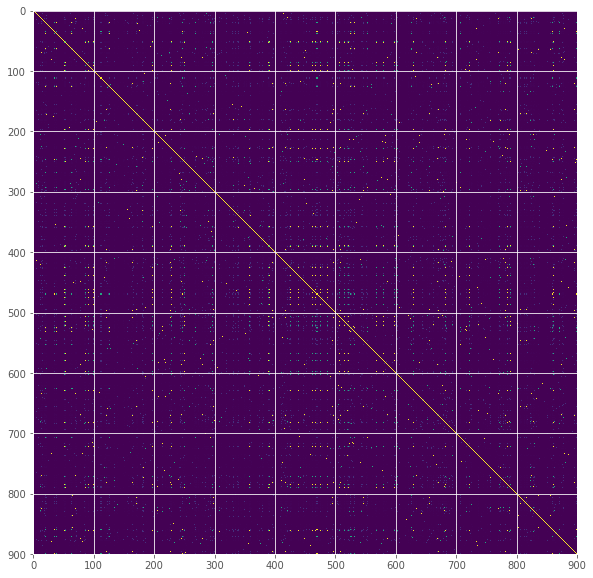

In [66]:
plt.imshow(G)

In [69]:
G_test = string_kernel(X_train, X_test)

In [73]:
G_test = G_test.T

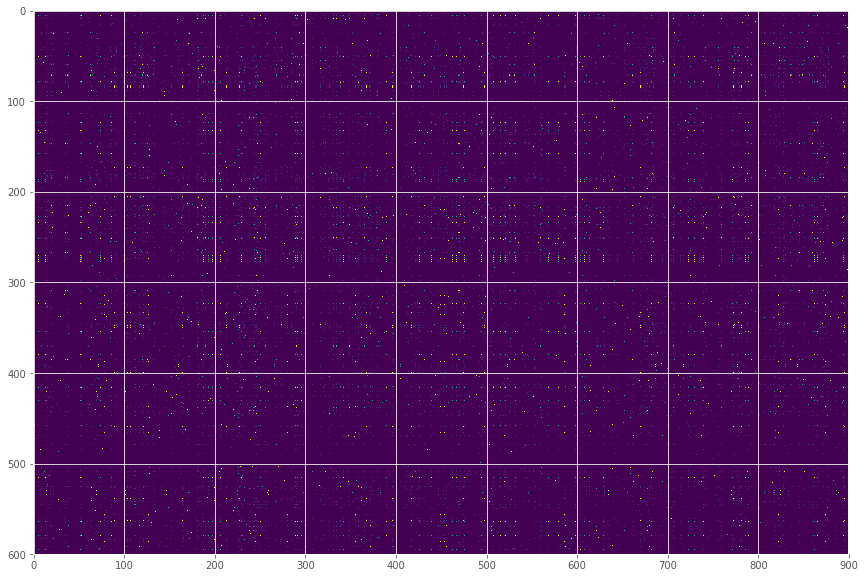

In [74]:
plt.imshow(G_test)

## Оценка качества (1 балл)

Обучите метод опорных векторов с различными значениями параметра штрафа $C$.<br/>
Для каждого значения выведите accuracy на обучащюей и контрольной выборке.

Постарайтесь достичь качества в 70% на тестовой выборке

In [71]:
from sklearn.metrics import accuracy_score

In [89]:
C_values = np.logspace(-3, 4, 60)

In [90]:
accuracy_df = pd.DataFrame(columns=['accuracy_train', 'accuracy_test', 'C'])

for C in C_values:
    svc = SVC(C=C, kernel='precomputed')
    svc.fit(G, y_train)
    accuracy_train = accuracy_score(svc.predict(G), y_train)
    accuracy_test = accuracy_score(svc.predict(G_test), y_test)
    accuracy_df = accuracy_df.append(
        {'C': C, 'accuracy_train': accuracy_train, 'accuracy_test': accuracy_test}, ignore_index=True)

In [91]:
accuracy_df.head()

,accuracy_train,accuracy_test,C
0,0.542222,0.568333,0.001000
1,0.542222,0.568333,0.001314
2,0.542222,0.568333,0.001727
3,0.542222,0.568333,0.002270
4,0.542222,0.568333,0.002982


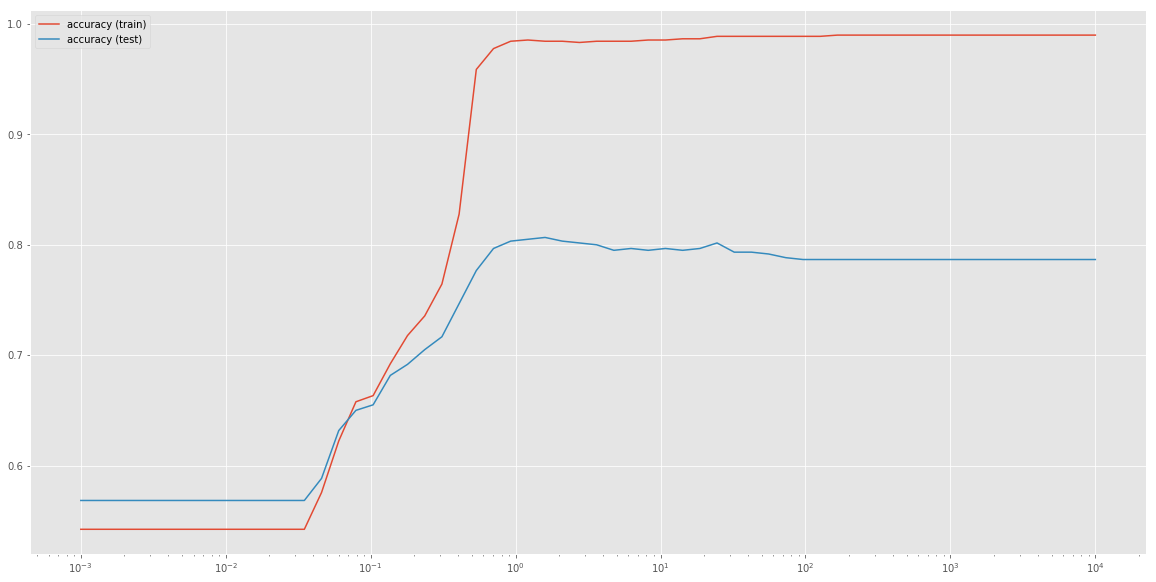

In [92]:
plt.plot(accuracy_df['C'], accuracy_df['accuracy_train'], label='accuracy (train)')
plt.plot(accuracy_df['C'], accuracy_df['accuracy_test'], label='accuracy (test)')
plt.xscale('log')
plt.legend()

In [94]:
parameters_train = accuracy_df.iloc[accuracy_df['accuracy_train'].argmax()]
parameters_test = accuracy_df.iloc[accuracy_df['accuracy_test'].argmax()]
print 'Лучшая на train: \n', parameters_train
print 'Лучшая на test: \n', parameters_test

Лучшая на train: 
accuracy_train      0.990000
accuracy_test       0.786667
C                 166.088278
Name: 44, dtype: float64
Лучшая на test: 
accuracy_train    0.984444
accuracy_test     0.806667
C                 1.597312
Name: 27, dtype: float64
